In [2]:
import os
import tarfile
from six.moves import urllib

#the root url for downloading the dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"

#create a local directory ~/datasets/housing and name it as HOUSING_PATH
HOUSING_PATH = os.path.join("datasets", "housing")

#build the downloading url for the housing.tgz file, 
#this should not relate to HOUSING_PATH although they have the same name
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    #if housing_path is not a directory(does not exist), create one
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    #create a target download path for the housing.tgz
    tgz_path = os.path.join(housing_path, "housing.tgz")
    #request the housing.tgz from the housing_url and save it at tgz_path
    urllib.request.urlretrieve(housing_url, tgz_path)
    #open the housing.tgz file and extract all of its content to the housing_path 
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    #close the tgz
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


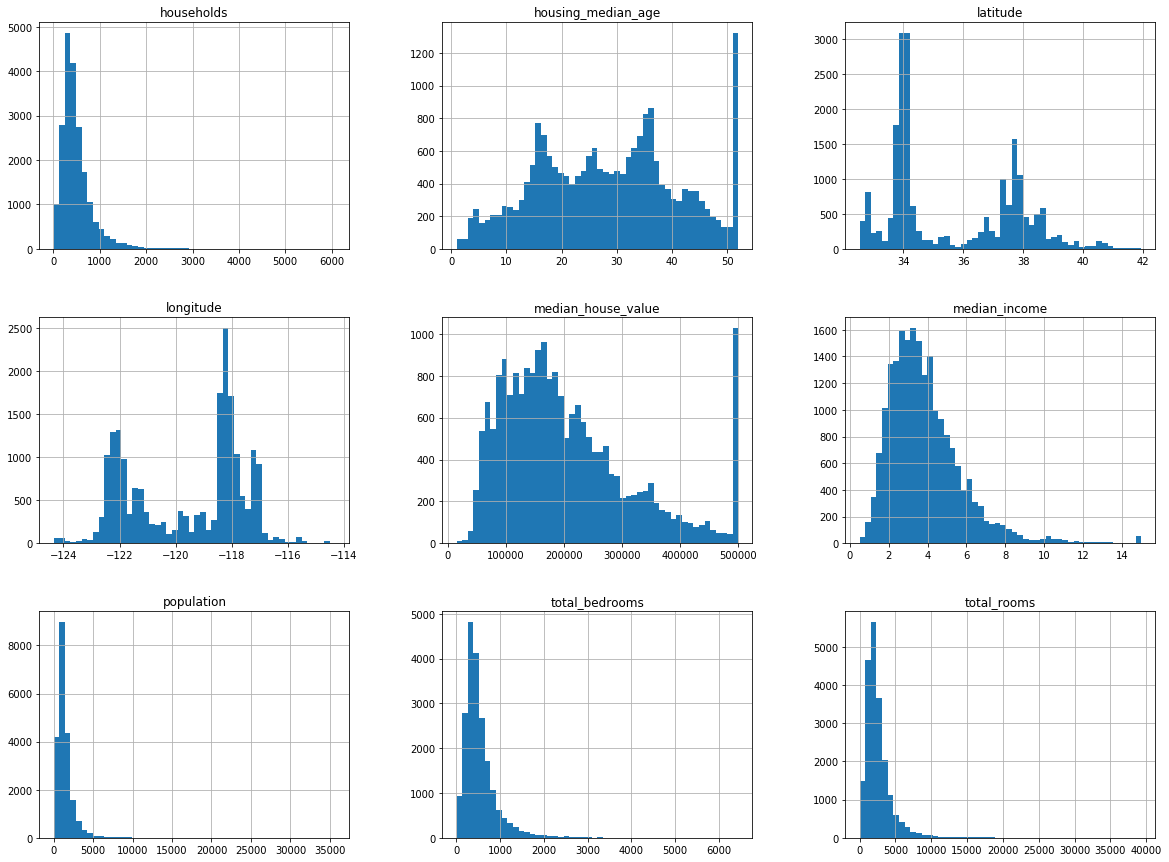

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
import numpy as np

    
def split_train_test(data, test_ratio):
    #use numpy to obtain an array of permutation from 0 to len(data)-1 inclusive
    shuffled_indices = np.random.permutation(len(data))
    
    #set test_set_size to be a ratio of the total set determined by test_ratio 
    test_set_size = int(len(data) * test_ratio)

    #test_indices is the portion of shuffled_indices' from beginning up to test_set_size
    test_indices = shuffled_indices[:test_set_size]
    
    #test_indices is the portion of shuffled_indices' from beginning up to test_set_size
    train_indices = shuffled_indices[test_set_size:]
    
    #return two sublists of data with traning indices and test_indices
    return data.iloc[train_indices], data.iloc[test_indices]

##### Caution #####
#  This method of splitting data depends on randomly generated permutation of indices
#  which means that training data and testing data will be different every time.
#  Over many iterations, the model being trained by the traning set will have seen all of the 
#  housing data which may cause over fitting. Its like giving test but using the same
#  Question as the review.
#  A random seed can be used to prevent issue metioned above but also woud fail when the 
#  data set upstream is updated with more or less rows of data.
   

In [11]:
# re-Generate these test set multiple times and see the difference in the sampled data 
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [12]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1849,-122.28,37.91,48.0,2083.0,298.0,685.0,286.0,7.3089,331200.0,NEAR BAY
10544,-117.76,33.71,14.0,4321.0,582.0,2025.0,578.0,8.3634,355100.0,<1H OCEAN
26,-122.28,37.85,49.0,1130.0,244.0,607.0,239.0,2.4597,93800.0,NEAR BAY
10265,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,<1H OCEAN
12018,-117.50,33.92,28.0,2101.0,337.0,1061.0,348.0,4.5500,146800.0,INLAND


In [13]:
#####
#  A better way to split data is to compute a hash for the identifier
#  of each entry of data.
#  Compute the hash and look at the last Byte
#  of the hash and check if it is under 51, which is roughly 20% of 256
#  This way, only ID that have certain hash ending will be put into the test_set.

import hashlib

# Check if the last Byte of the hash of this identifier is less than 256*test_ratio
def test_set_check(identifier, test_ratio, hash):
    #convert the identifier to a 64bit integer and compute the hash of it
    #Then digest the hash into 'chuncks' (bytes in this case I believe)
    #Then take the last element of the list and see if it is less than 256*test_ratio
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5): #use md5 for hash
    #obtain the index of each row
    ids = data[id_column]
    #use lambda function to wrap test-set_check above allow inline function without forloop
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    #in_test_set is a boolean array indicating which entry should be in test_set
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()   # add an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [16]:
#  also can use the split function with the sklearn library 

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #random_state is like random seed

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [18]:
######
#  We have been using random numbers or some huristics to determine
#  how the data would be splitted. But often with small data size
#  we need to sample the data strategically to ensure that the sample
#  that we have collected are a good representation of the actual data
#  and we really can't do that by using just random numbers and huristic.
#  This requires more feature engineering and insight of the data.

#add a column: income_cat, which is derived from dividing the medium_income into multiple categories
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

#Contain only values that are less than 5 and merge entries that are highers than 5 into category 5.0
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

#shows the percentage of each income catagory
                                                                            #housing["income_cat"].value_counts()
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
#use sklearn library to strategically split the data

from sklearn.model_selection import StratifiedShuffleSplit

#Declare some parameters for the 'splitter' 
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#using the splitter to split the housing data set index into train and test based on income_cat
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]
    
#Delete the income_cat colunm
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

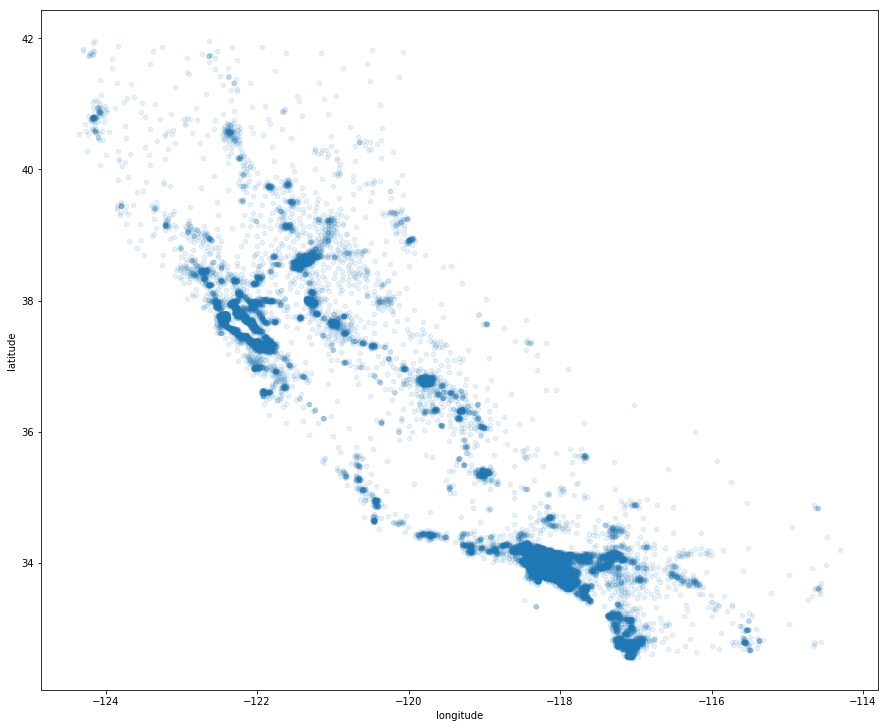

In [20]:
#plot a scatter plot of the longitude vs latitude in the housing data.
#set alpha to 0.1 to help visualize where the data overlapped the most(or have the most density)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(15,12.5))
plt.show()

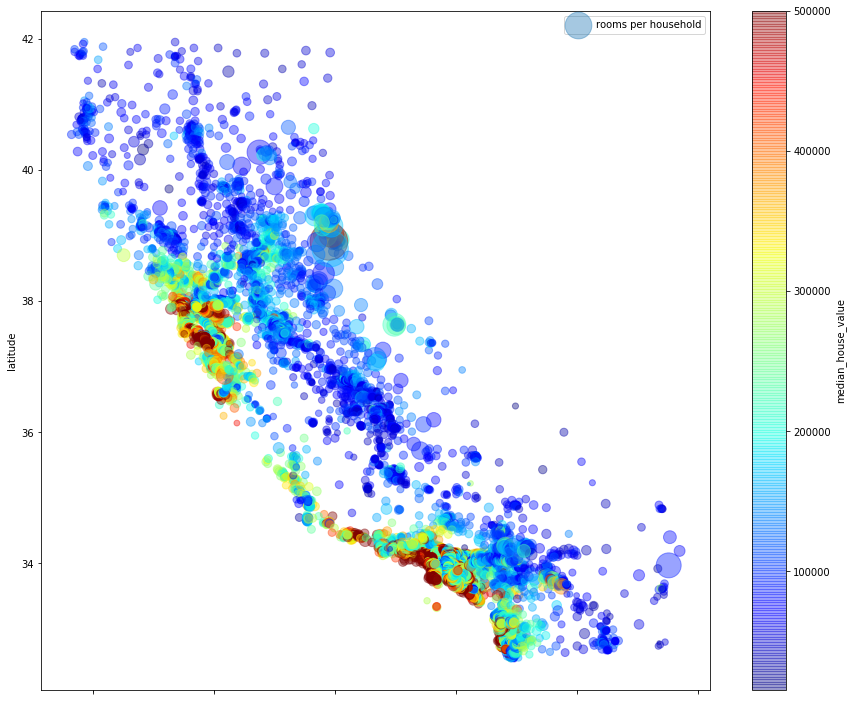

In [21]:
# plot another scatter plot with x as logitude and y as latitude
# setalpha to 0.4 to help with visualizing data density
# used s(size) to shoud population of each data entry
# used cmap to visualize the housing price with blue=low price and red=high price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing["total_rooms"]/housing["households"]*10, label="rooms per household",
                c="median_house_value",  cmap=plt.get_cmap("jet"), colorbar=True,
                figsize=(15,12.5)
            )
plt.show()

#From this plot we can see many informations:
#the price in central vally is significantly cheaper than the bay areas
#housing price in the bay areas are highest around san fancisco and los angles

In [22]:
#A correlation matrix showing the correlation between each colum and row
#The disgonal is always one for correlation with self
corr_matrix = housing.corr()
print (corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
income_cat          -0.010690 -0.085528           -0.146920     0.220528   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude 

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

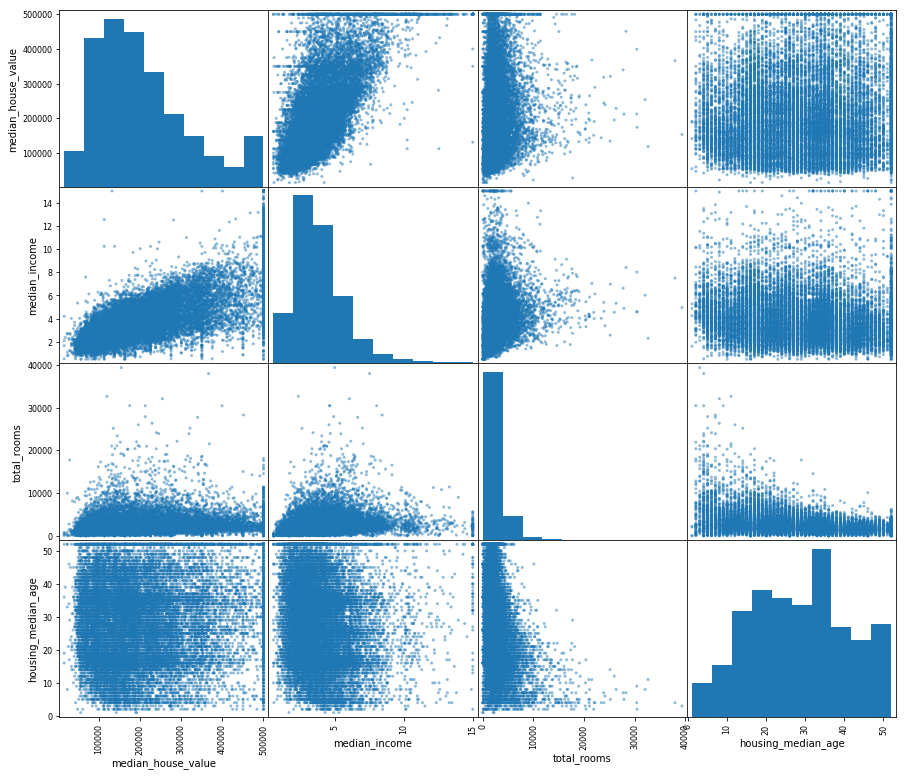

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(15, 13))
plt.show()

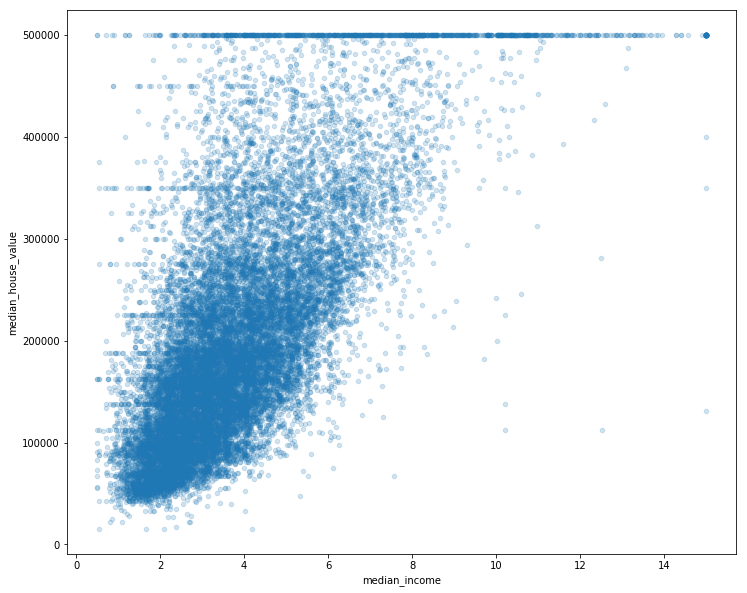

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2, figsize=(12,10))
plt.show()

#From the plot we can definitly see the positive correlation between
#the median_income and median_housing_value, rich people generally live
#in better houses. There are many data that are capped at 500000 
#and several more capped price though out the graph. 
#These data points might need to be removed inorder to prevent some overfitting 

In [26]:
#often more informative information can be drived by combining 
#the original attributes from the data table. 
#such as population per household, rooms per house hold etc
#By combining attributes we can derive more useful information and more insights

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

#rebuilt the correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

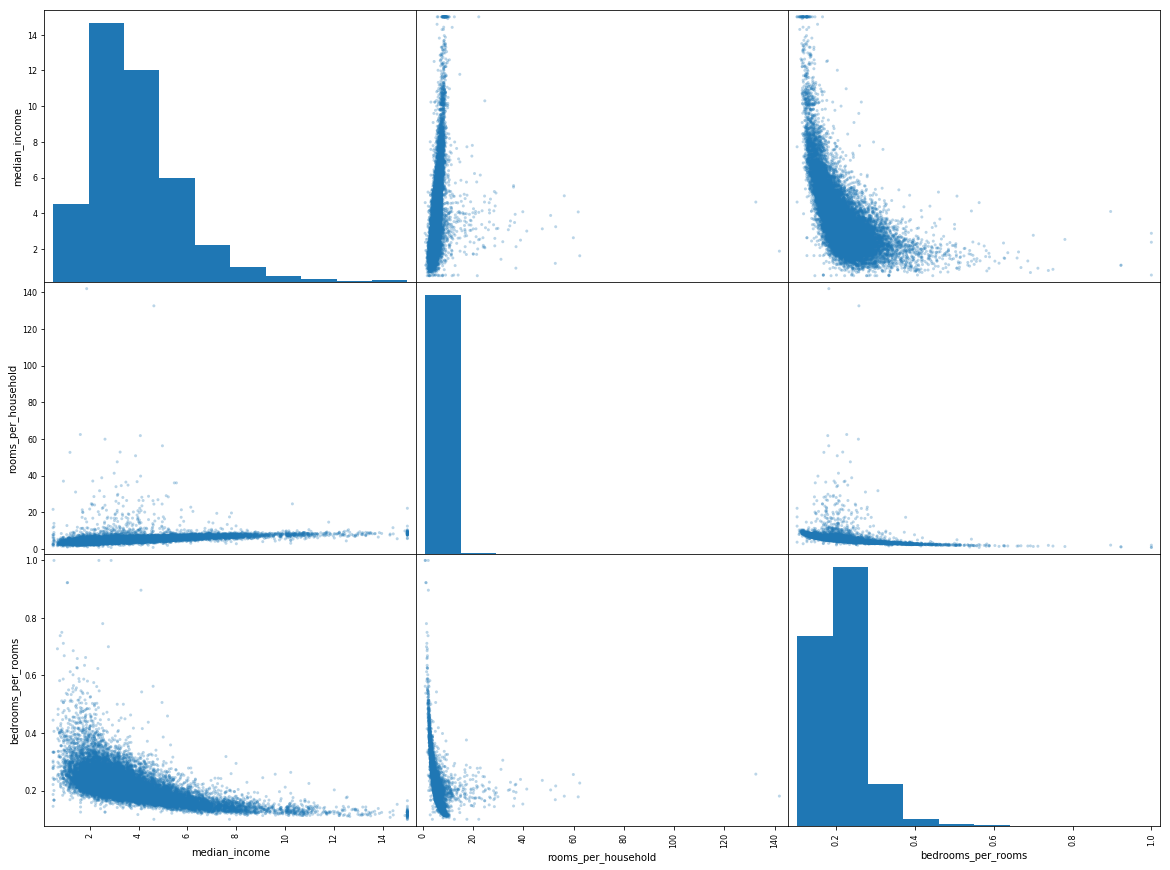

In [27]:
attributes=["median_income", "rooms_per_household", "bedrooms_per_rooms"]
scatter_matrix(housing[attributes], alpha=0.3, figsize=(20,15))
plt.show()


In [48]:
#Removing the median_house_value column from housing
#drop() does not operates on the original table but instead creates an copy
housing = strat_train_set.drop("median_house_value", axis=1)
#Use the column median_housing_value as our lebel. The algorithm will be train 
#to predict this attribute given the rest of the data.
housing_labels = strat_train_set["median_house_value"].copy()
housing.head()

#Since most machine learning algorithm cannot work with data set wit missing values


#Three ways to do it:
#    housing.drop("total_bedrooms", axis=1)  This will completely drop the column with some empty values
#    housing["total_bedrooms"].fillna(median) This will fill the empty entry with the medium of the column
#    housing.dropna(subset=["total_bedrooms"]) Remove all rows that has an empty entry in the column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [33]:
#Uses sklearn to process these empty entries

from sklearn.preprocessing import Imputer

#use the library to fill in na with median, but this only works with number
imputer = Imputer(strategy = "median")
#Drop the column for ocean_proximity since it contains texts
housing_num = housing.drop("ocean_proximity", axis=1)
#Fit imputer into housing_num, imputer will compute the median for each 
#column and then when needed can place these values in to the missing entry
imputer.fit(housing_num)

X = imputer.tansform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [46]:
from sklearn.preprocessing import  OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
#the above two processing can be combined into one using the LabelBinarizer

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [55]:
#We want to implement a custom transformer that can be used to add combined attributes to our dataset

from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  #we are not inplementing the fit function 
    
    def transform(self, X, y=None):
        #we first calculates the rooms_perhousehold and population_per_household through the 
        #same method we used earlier when we were exploring these combined attributes
        rooms_per_household = X[:, room_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        #If the instance of this transformer created was specifed to add bedrooms_per_room
        #then we will need to calculate that as well and return the concatenation of the four dataset 
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        #else we can just return the concatenation  of the imput dataset X, and the combined attribute
        #along the second axis, or in other word stack rm/hshold and pop/hshold as new columns
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs)

[[-121.89 37.29 38.0 ..., '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ..., '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ..., 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ..., 
 [-116.4 34.09 9.0 ..., 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ..., '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ..., 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [65]:
housing[["longitude", "latitude", "total_rooms"]].head()

,longitude,latitude,total_rooms
17606,-121.89,37.29,1568.0
18632,-121.93,37.05,679.0
14650,-117.20,32.77,1952.0
3230,-119.61,36.31,1847.0
3555,-118.59,34.23,6592.0


In [ ]:
#Building a transformation pipeline can aid the processing of the data in sequence

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)     #our numeric attributes were derived earlier by dropping the ocean proximity column
                                    #We transform that into a list of attributes
    
cat_attribs = ["ocean_proximity"]   #our catagorical attributes are the ocean_proximity

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs))  #first we select which set of data we want to work with note that the
                                                  #housing data set we pass in have both catagorical and numerical data
    ('imputer', Imputer(strategy="median")),      #then we need to fill in the empty entry with median of the column
    ('attribs_adder', CombinedAttributesAdder()), #then we need to add some combined attributes to out data
    ('std_scaler', StandardScaler()),             #and atlast we need to standarlize out data (feature scaling)
])

#define the categorical pipeline
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

#combine the two pipeline together using FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)